##Assignment on Classification

In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##1. Read the dataset to python environment

In [257]:
data=pd.read_csv('iris.csv')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##2. Do the necessary pre-processing steps


In [258]:
data.shape

(150, 5)

In [260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [261]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [262]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [263]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [264]:
for col in['SL','SW','PL']:
  data[col]=data[col].fillna(data[col].median())

In [215]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

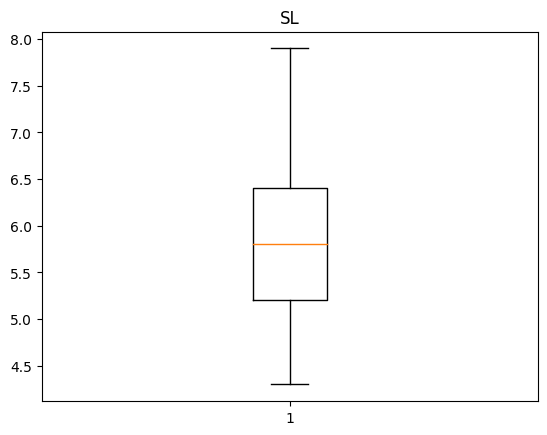

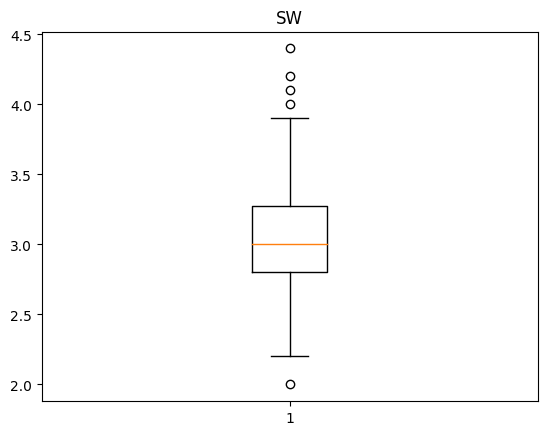

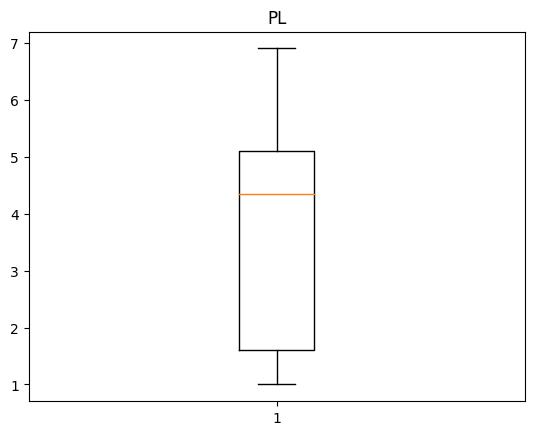

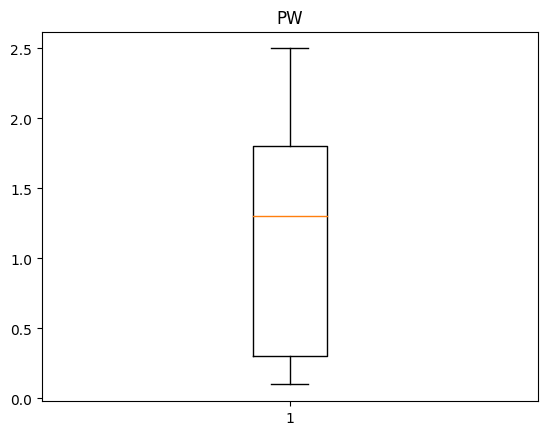

In [265]:
num_cols=['SL','SW','PL','PW']
for i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [266]:
Q1=np.percentile(data['SW'],25,method='midpoint')
Q2=np.percentile(data['SW'],50,method='midpoint')
Q3=np.percentile(data['SW'],75,method='midpoint')
print('Q1 is',Q1)
print('Q2 is',Q2)
print('Q3 is',Q3)
print('median =',data['SW'].median())

Q1 is 2.8
Q2 is 3.0
Q3 is 3.25
median = 3.0


In [267]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print('min is',low_lim)
print('max is',up_lim)
outlier=[]
for x in data['SW']:
    if ((x>up_lim) or (x<low_lim)):
     outlier.append(x)

min is 2.1249999999999996
max is 3.9250000000000003


In [268]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [269]:
ind1=data['SW']>up_lim
data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [270]:
data.drop([14, 15, 32, 33],inplace=True)
data.head(20)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


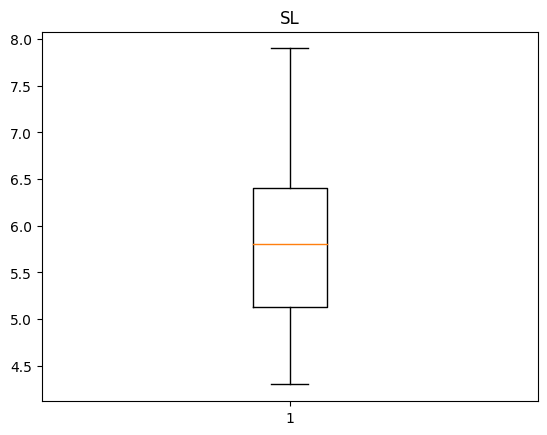

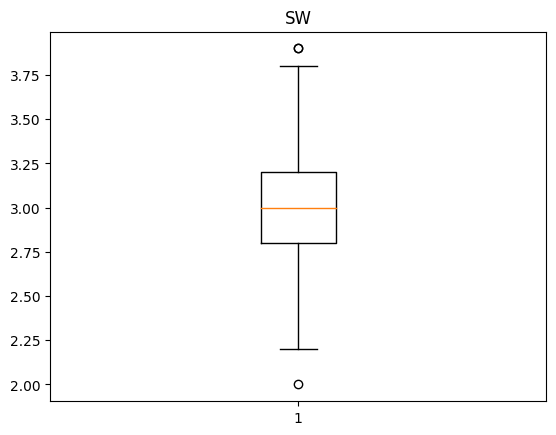

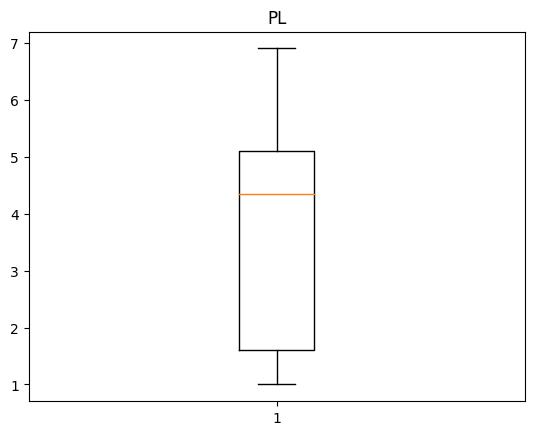

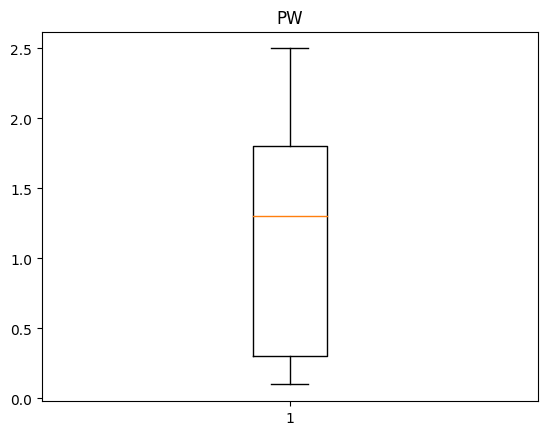

In [272]:
num_cols=['SL','SW','PL','PW']
for i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [273]:
data['SW'].nunique()

19

In [274]:
data['SW'].value_counts()

3.0    32
2.8    14
3.2    13
3.1    12
3.4    12
2.9    10
2.7     9
2.5     6
3.8     6
2.6     5
3.3     5
3.5     4
2.3     4
2.4     3
2.2     3
3.6     3
3.9     2
3.7     2
2.0     1
Name: SW, dtype: int64

In [275]:
data['SW'].value_counts(normalize=True)

3.0    0.219178
2.8    0.095890
3.2    0.089041
3.1    0.082192
3.4    0.082192
2.9    0.068493
2.7    0.061644
2.5    0.041096
3.8    0.041096
2.6    0.034247
3.3    0.034247
3.5    0.027397
2.3    0.027397
2.4    0.020548
2.2    0.020548
3.6    0.020548
3.9    0.013699
3.7    0.013699
2.0    0.006849
Name: SW, dtype: float64

In [276]:
data=pd.get_dummies(data)
data.head()


,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,5.8,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [277]:
data['SL'].nunique()

35

In [278]:
x=data.drop(['SW'],axis=1)
y=data['SW']

In [279]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

##3. Find out which classification model gives the best result

1. Logistic Regression
2. KNN
3. SVM
4. Decision Tree
5. Random Forest

1. Logistic Regression

In [280]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [281]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_train)
y1_transformed = lab.fit_transform(y_test)
#view transformed values
print(y_transformed)
print(y1_transformed)

[ 9  9  7 10  9 11 14  7 10 10 17  4 13  9  9 13  7 16 14  9  9  0  4 13
  4 10  7 11 17  4 10  5  7  9  9  3  3 18  7  9  2 13  3  9  6 13 11  8
 13  2 17  9  2  8  9  9  7 10 17 11  7  7 13 15  9 11  7  8  7  9 11  4
 10  9  6  9  9  9  1  6 10  5  6 12  9  5 14 12  8  6 13  2 10  9 12  5
  8  8 11  9  8 11  9 15  9 11 18  8  4]
[ 8  2  7 12 13  5  9  5  7  9  5  0  5  2  6 10  4  7  6  2  8  3  9  3
  7  4  0  5  1  6 11  9  5  3 13  5  2]


In [282]:
#fit logistic regression model
classifier = LogisticRegression(random_state=42, max_iter=1000)
model=classifier.fit(x_train, y_transformed)

In [283]:
y_predictions=model.predict(x_test)

In [284]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [285]:
confusion_matrix(y1_transformed,y_predictions)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 6, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]])

In [286]:
y_predictions

array([ 9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  7,  9,  9,  9,  9,  9,  9,  7,  7,  9,  9, 11,  9,  9,
        9,  9,  9])

In [287]:
print('Accuracy=',accuracy_score(y1_transformed,y_predictions))
print('Precision=',precision_score(y1_transformed,y_predictions,average='macro'))
print('Recall=',recall_score(y1_transformed,y_predictions, average='micro'))
print('F1=',f1_score(y1_transformed,y_predictions, average='weighted'))

Accuracy= 0.08108108108108109
Precision= 0.006493506493506494
Recall= 0.08108108108108109
F1= 0.017531044558071585


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##2.KNN

In [288]:
from sklearn.neighbors import KNeighborsClassifier

In [290]:
metric_k=[]
neighbors=np.arange(3,14)
neighbors

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [291]:
y_test=y_test.round(1)

In [292]:
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_transformed)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y1_transformed,y_pred)
    metric_k.append(acc)

In [293]:
metric_k

[0.08108108108108109,
 0.10810810810810811,
 0.05405405405405406,
 0.05405405405405406,
 0.08108108108108109,
 0.05405405405405406,
 0.05405405405405406,
 0.02702702702702703,
 0.0,
 0.0,
 0.0]

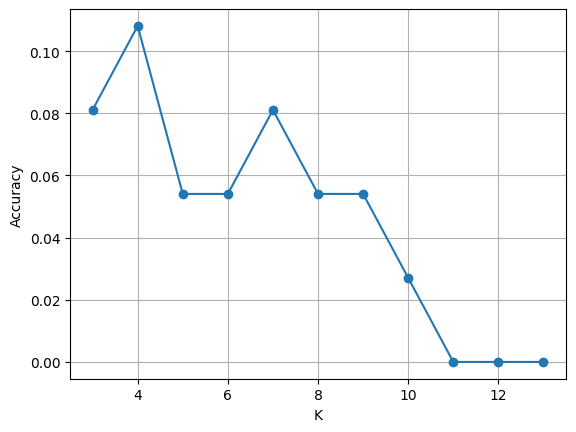

In [294]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()

In [295]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='euclidean')
classifier.fit(x_train,y_transformed)
y_pred=classifier.predict(x_test)
acc=accuracy_score(y1_transformed,y_pred)
metric_k.append(acc)

In [296]:
print('Accuracy=',accuracy_score(y1_transformed,y_predictions))
print('Precision=',precision_score(y1_transformed,y_predictions,average='macro'))
print('Recall=',recall_score(y1_transformed,y_predictions,average='micro'))
print('F1=',f1_score(y1_transformed,y_predictions,average='weighted'))

Accuracy= 0.08108108108108109
Precision= 0.006493506493506494
Recall= 0.08108108108108109
F1= 0.017531044558071585


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [297]:
confusion_matrix(y1_transformed,y_pred)

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 1, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

##3.svm

In [298]:
from sklearn.svm import SVC

In [299]:
svm_cls= SVC(kernel='linear')
svm_cls=svm_cls.fit(x_train,y_transformed)
y_pred_svm=svm_cls.predict (x_test)

In [300]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [301]:
confusion_matrix(y1_transformed,y_pred_svm)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]])

In [302]:
accuracy_score(y1_transformed,y_pred_svm)

0.10810810810810811

In [303]:
svm_cls1=SVC(kernel='rbf')
svm_cls1=svm_cls1.fit(x_train,y_transformed,)
y_pred_svm1=svm_cls1.predict (x_test)

In [304]:
confusion_matrix(y1_transformed,y_pred_svm1)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]])

In [305]:
accuracy_score(y1_transformed,y_pred_svm1)

0.10810810810810811

##4.Decision Tree

In [306]:
from sklearn.tree import DecisionTreeClassifier

In [307]:
dt_cls=DecisionTreeClassifier()
model=dt_cls.fit(x_train,y_transformed)
y_pred_dt=model.predict (x_test)

In [308]:
confusion_matrix(y1_transformed,y_pred_dt)

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [309]:
accuracy_score(y1_transformed,y_pred_dt)

0.05405405405405406

##5.RandomForest

In [310]:
from sklearn.ensemble import RandomForestClassifier

In [315]:
rf_cls=RandomForestClassifier(n_estimators=12)
model_rf=rf_cls.fit(x_train,y_transformed)
y_pred_rf=model.predict (x_test)

In [312]:
confusion_matrix(y1_transformed,y_pred_rf)

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [313]:
accuracy_score(y1_transformed,y_pred_rf)

0.05405405405405406

##Find out which classification model gives the best result
svm